# Decision Tree para clasificación
- Fuente ejemplo: https://medium.com/towards-data-science/understanding-decision-trees-for-classification-python-9663d683c952
- Base de datos: https://en.wikipedia.org/wiki/Iris_flower_data_set
- Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Objetivo: Clasificar flores

## 1. Cargar librerías y datos
### Librerías

In [38]:
#Manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Datos
from sklearn.datasets import load_iris

#Procesamiento
from sklearn.model_selection import train_test_split

#Modelo
from sklearn.tree import DecisionTreeClassifier

#Evaluación del modelo
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Datos
Iris de los datasets scikit-learn

In [39]:
#DataSet de la propia librería
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 2. Comprensión inicial de los datos
### Datos generales

In [40]:
#Descripción general de los datos
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Cantidad por categoría
print(df.groupby('target').size())
# Proporción por categoría
print(df.groupby('target').size()/len(df))

target
0    50
1    50
2    50
dtype: int64
target
0    0.333333
1    0.333333
2    0.333333
dtype: float64


### Revisión gráfica

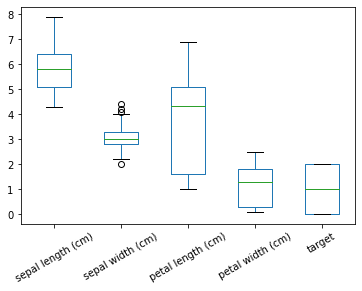

In [56]:
#Gráfico boxplot para ver la amplitud de las variables
df.boxplot(rot=30)
plt.grid(False)
plt.show()

## 3. Peparación de DataFrame

### Train-Test split

In [8]:
#División del dataset para train y test
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)
print("Train shape")
print("X_train:" + str(X_train.shape))
print("y_train:" + str(y_train.shape))
print("Test shape")
print("X_test:" + str(X_test.shape))
print("y_test:" + str(y_test.shape))

Train shape
X_train:(112, 4)
y_train:(112,)
Test shape
X_test:(38, 4)
y_test:(38,)


In [9]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [10]:
y_train.head()

61     1
92     1
112    2
2      0
141    2
Name: target, dtype: int32

## 4. Modelo

### 4.1 Modelo DTC con Gini
#### Entrenamiento

In [11]:
#Entrenamiento
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 2, random_state = 0)
clf = clf_gini
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [12]:
#Score: accuracy medio de entrenamiento
clf.score(X_train, y_train)

0.9642857142857143

In [13]:
#profundidad del árbol
clf.get_depth()

2

In [14]:
#leaves: número de hojas del árbol
clf.get_n_leaves()

3

In [15]:
#Calcule la ruta de poda con el costo mínimo.
clf.cost_complexity_pruning_path(X_train, y_train)

{'ccp_alphas': array([0.        , 0.26539835, 0.33279549]),
 'impurities': array([0.06650641, 0.33190476, 0.66470026])}

In [16]:
#ruta de decision
path = clf.decision_path(X_train)
path.toarray()

array([[1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1,

#### Predicción

In [17]:
#Aplicar el modelo a la base de validación
predicciones = clf.predict(X_test)
predicciones

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2])

In [18]:
#Probabilidad de clasificación
print("clasificación: [0,1,2]")
clf.predict_proba(X_test)

clasificación: [0,1,2]


array([[0.        , 0.02564103, 0.97435897],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02564103, 0.97435897],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02564103, 0.97435897],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.02564103, 0.97435897],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.

In [19]:
#Score: accuracy medio de test
clf.score(X_test, y_test)

0.8947368421052632

#### Tabla de resultados

In [20]:
tabla = pd.DataFrame(X_test).copy()
#Agregar y_verdaderas
tabla['target'] = y_test
#Agregar y de predicción
tabla['target prediction'] = predicciones
tabla['T/F'] = tabla['target']==tabla['target prediction']
tabla

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target prediction,T/F
114,5.8,2.8,5.1,2.4,2,2,True
62,6.0,2.2,4.0,1.0,1,1,True
33,5.5,4.2,1.4,0.2,0,0,True
107,7.3,2.9,6.3,1.8,2,2,True
7,5.0,3.4,1.5,0.2,0,0,True
100,6.3,3.3,6.0,2.5,2,2,True
40,5.0,3.5,1.3,0.3,0,0,True
86,6.7,3.1,4.7,1.5,1,1,True
76,6.8,2.8,4.8,1.4,1,1,True
71,6.1,2.8,4.0,1.3,1,1,True


In [21]:
#Cantidad verdader/falso
print(tabla['T/F'].value_counts())

#Proporción verdader/falso
print(((tabla['T/F'].value_counts())/len(tabla))*100)

True     34
False     4
Name: T/F, dtype: int64
True     89.473684
False    10.526316
Name: T/F, dtype: float64


### 4.2 Modelo DTC con Entropía
#### Entrenamiento

In [22]:
#Entrenamiento
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = None, random_state = 0)
clf = clf_entropy
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
#Score: accuracy medio de entrenamiento
clf.score(X_train, y_train)

1.0

In [24]:
#profundidad del árbol
clf.get_depth()

4

In [25]:
#leaves: número de hojas del árbol
clf.get_n_leaves()

7

#### Predicción

In [26]:
#Aplicación del modelo
predicciones = clf.predict(X_test)
predicciones

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [27]:
#Probabilidad de clasificación
print("clasificación: [0,1,2]")
clf.predict_proba(X_test)

clasificación: [0,1,2]


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [28]:
#Score: accuracy medio de test
clf.score(X_test, y_test)

0.9736842105263158

## 5. Evaluación del modelo

#### Matriz de confusión

In [29]:
#Matriz de confusión gini
pred1 = clf_gini.predict(X_test)
print("confusion_matrix con gini")
print(confusion_matrix(y_test, pred1))

confusion_matrix con gini
[[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]


In [30]:
#Matriz de confusión entropía
pred2 = clf_entropy.predict(X_test)
print("confusion_matrix con entropía")
print(confusion_matrix(y_test, pred2))

confusion_matrix con entropía
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


#### Métricas

In [57]:
#Gini
print("Reporte de precisión con gini")
print(classification_report(y_test, pred1))

Reporte de precisión con gini
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.94      0.88        16
           2       0.86      0.67      0.75         9

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38



In [58]:
#Entropía
print("Reporte de precisión con entropía")
print(classification_report(y_test, pred2))

Reporte de precisión con entropía
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## 6. Tuning the Depth of a Tree
Encontrar el valor máximo para la profundidad del árbol

In [33]:
# Lista de valores a probar
max_depth_range = list(range(1, 6))
# Lista para almacenar accuracy para cada prueba
accuracy = []

# Ciclo para probar profundidad
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)
accuracy

[0.5789473684210527,
 0.8947368421052632,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

In [34]:
#Tabla
depth_variation = pd.DataFrame(max_depth_range)
depth_variation['accuracy'] = accuracy
depth_variation

,0,accuracy
0,1,0.578947
1,2,0.894737
2,3,0.973684
3,4,0.973684
4,5,0.973684


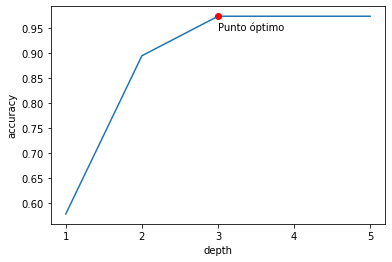

In [64]:
#Gráfica
plt.figure()
plt.plot(max_depth_range, accuracy)
#Etiquetas
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.xticks([1,2,3,4,5])
#Anotaciones
plt.plot(3,0.973684, marker="o", color="red")
plt.text(3,0.945,"Punto óptimo")
plt.show()

## 7. Features importance
Cálculo de la importancia de cada variable en el modelo, ya sea por el índice gini o entropía

In [65]:
#Evaluando con gini
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf_gini.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal width (cm),0.556
2,petal length (cm),0.444
0,sepal length (cm),0.000
1,sepal width (cm),0.000


In [66]:
#Evaluando con entropía
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf_entropy.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal width (cm),0.683
2,petal length (cm),0.299
1,sepal width (cm),0.018
0,sepal length (cm),0.000
